In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder

In [138]:
# define RMSE as a function, since we'll use this in the NN model 
def rmse(target,prediction):
    return(np.sqrt(((target - prediction)**2).sum()/len(target)))

In [139]:
## EOSC410 Project
## Authors: Vanessa Yau + Christina Rutherford
saveIt = 1 # set to 1 to save all figs

## IMPORT 2016 DATA
# import avalanche data for sea-to-sky region
avy_risk_2016 = pd.read_csv('sea-to-sky_JanApr_2016_avy.csv')
avy_date_2016 = avy_risk_2016['Date']
below_tree_2016 = avy_risk_2016['Below Treeline']
below_tree_2016 = np.array(below_tree_2016)
tree_2016 = avy_risk_2016['Treeline']
tree_2016 = np.array(tree_2016)
above_tree_2016 = avy_risk_2016['Above Treeline']
above_tree_2016 = np.array(above_tree_2016)

# import era5 2m temp data
temp_2m_2016 = np.load('Sea-to-Sky_JanApr_2016_Temp2m.npy')
snowdep_2016 = np.load('Sea-to-Sky_JanApr_2016_SnowDepth.npy')

# averaging TEMP from (31,7,13) to (31, 7) to (31,1)
temp_mean_2016 = np.mean(temp_2m_2016,axis=(1,2))
# averaging SNOW from (31, 7, 13) to (31, 7) to (31, 1)
snowdep_mean_2016 = np.mean(snowdep_2016,axis=(1,2))

## IMPORT 2017 DATA
# import avalanche data for sea-to-sky region
avy_risk_2017 = pd.read_csv('sea-to-sky_JanApr_2017_avy.csv')
avy_date_2017 = avy_risk_2017['Date']
below_tree_2017 = avy_risk_2017['Below Treeline']
below_tree_2017 = np.array(below_tree_2017)
tree_2017 = avy_risk_2017['Treeline']
tree_2017 = np.array(tree_2017)
above_tree_2017 = avy_risk_2017['Above Treeline']
above_tree_2017 = np.array(above_tree_2017)

# import era5 2m temp data
temp_2m_2017 = np.load('Sea-to-Sky_JanApr_2017_Temp2m.npy')
snowdep_2017 = np.load('Sea-to-Sky_JanApr_2017_SnowDepth.npy')

# averaging TEMP from (31,7,13) to (31, 7) to (31,1)
temp_mean_2017 = np.mean(temp_2m_2017,axis=(1,2))
# averaging SNOW from (31, 7, 13) to (31, 7) to (31, 1)
snowdep_mean_2017 = np.mean(snowdep_2017,axis=(1,2))

days_2017 = np.linspace(1,len(avy_date_2017),len(avy_date_2017))

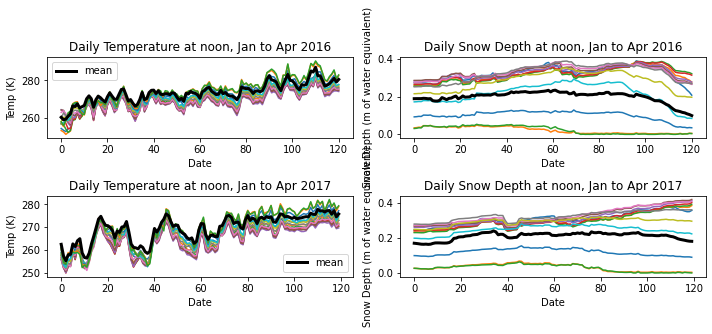

In [140]:
# visualize current temp and snow depth data
plt.figure(figsize=(10,4))

plt.subplot(221)
plt.plot(temp_2m_2016[:,1])
plt.plot(temp_mean_2016, color = 'k',label = 'mean', linewidth = 3)
plt.xlabel('Date') 
plt.ylabel('Temp (K)')
plt.legend()
plt.title('Daily Temperature at noon, Jan to Apr 2016')

plt.subplot(222)
plt.plot(snowdep_2016[:,1])
plt.plot(snowdep_mean_2016, color = 'k',label = 'mean', linewidth = 3)
plt.xlabel('Date')
plt.ylabel('Snow Depth (m of water equivalent)')
plt.title('Daily Snow Depth at noon, Jan to Apr 2016')

plt.subplot(223)
plt.plot(temp_2m_2017[:,1])
plt.plot(temp_mean_2017, color = 'k',label = 'mean', linewidth = 3)
plt.xlabel('Date')
plt.ylabel('Temp (K)')
plt.legend()
plt.title('Daily Temperature at noon, Jan to Apr 2017')

plt.subplot(224)
plt.plot(snowdep_2017[:,1])
plt.plot(snowdep_mean_2017, color = 'k',label = 'mean', linewidth = 3)
plt.xlabel('Date')
plt.ylabel('Snow Depth (m of water equivalent)')
plt.title('Daily Snow Depth at noon, Jan to Apr 2017')

plt.tight_layout()
# plt.show()
# if saveIt:
#     plt.savefig('fig_JanApr2016-17_temp_snowdep.png')

In [141]:
# normalize 2016 data
temp_norm_2016 = (temp_mean_2016 - temp_mean_2016.mean())/temp_mean_2016.std()
snowdep_norm_2016 = (snowdep_mean_2016 - snowdep_mean_2016.mean())/snowdep_mean_2016.std()
# reshape data from (31,) to (31, 1)
# temp_norm_2016 = temp_norm_2016.reshape(-1, 1)
# snowdep_norm_2016 = snowdep_norm_2016.reshape(-1, 1)

# normalize 2017 data
temp_norm_2017 = (temp_mean_2017 - temp_mean_2017.mean())/temp_mean_2017.std()
snowdep_norm_2017 = (snowdep_mean_2017 - snowdep_mean_2017.mean())/snowdep_mean_2017.std()
# reshape data from (31,) to (31, 1)
# temp_norm_2017 = temp_norm_2017.reshape(-1, 1)
# snowdep_norm_2017 = snowdep_norm_2017.reshape(-1, 1)

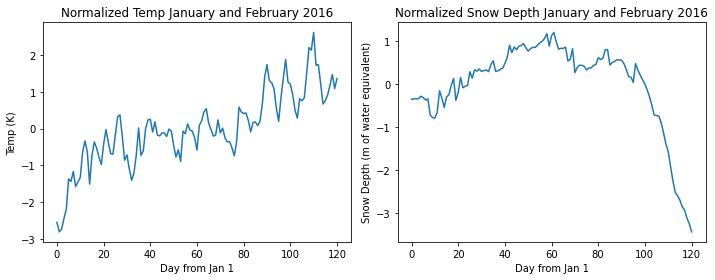

In [142]:
#visualize normalized data
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(temp_norm_2016)
#plt.plot(temp_mean, color = 'k',label = 'mean', linewidth = 3)
plt.xlabel('Day from Jan 1')
plt.ylabel('Temp (K)')
plt.title('Normalized Temp January and February 2016')

plt.subplot(1,2,2)
plt.plot(snowdep_norm_2016)
#plt.plot(snowdep_mean, color = 'k',label = 'mean', linewidth = 3)
plt.xlabel('Day from Jan 1')
plt.ylabel('Snow Depth (m of water equivalent)')
plt.title('Normalized Snow Depth January and February 2016')

plt.tight_layout()
# plt.show()
# if saveIt == 1:
#     plt.savefig('fig_JanApr2017_normalized_temp_snowdep.png')

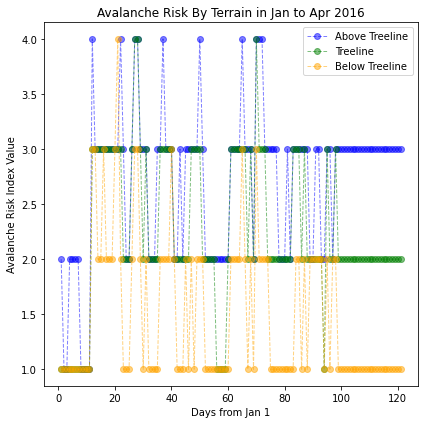

In [143]:
# plot avy risk data
days_2016 = np.linspace(1,len(avy_date_2016),len(avy_date_2016))
plt.figure(figsize=(6,6))
plt.plot(days_2016,above_tree_2016,color='blue',label='Above Treeline',alpha=0.5,marker='o',linewidth=1,linestyle='dashed')
plt.plot(days_2016,tree_2016,color='green',label='Treeline',alpha=0.5,marker='o',linewidth=1,linestyle='dashed')
plt.plot(days_2016,below_tree_2016,color='orange',label='Below Treeline',alpha=0.5,marker='o',linewidth=1, linestyle='dashed')
plt.legend()
plt.xlabel('Days from Jan 1')
plt.ylabel('Avalanche Risk Index Value')
plt.title('Avalanche Risk By Terrain in Jan to Apr 2016')

plt.tight_layout()
if saveIt == 1:
    plt.savefig('fig_JanApr2016_avyrisk.png')

In [144]:
# turn avy data into one hot vectors for model
# above treeline
enc_at = OneHotEncoder(max_categories=5).fit(above_tree_2016.reshape(-1,1))
enc_at.categories_
at_cat = enc_at.transform(above_tree_2016.reshape(-1,1)).toarray()
# treeline
enc_t = OneHotEncoder(max_categories=5).fit(tree_2016.reshape(-1,1))
enc_t.categories_
t_cat = enc_t.transform(tree_2016.reshape(-1,1)).toarray()
# below treeline
enc_bt = OneHotEncoder(max_categories=5).fit(below_tree_2016.reshape(-1,1))
enc_bt.categories_
bt_cat = enc_bt.transform(below_tree_2016.reshape(-1,1)).toarray()

In [145]:
# define variables for MLP
N = len(days_2016) # size of data
n_predictors = 2
predictors = np.vstack((temp_norm_2016,snowdep_norm_2016)).T

target = t_cat ## CHANGE THIS TO bt_cat for below treeline, t_cat for treeline, and at_cat for above treeline **only change this line**
# loop through the 3 terrain categories for MLP on each
fracTrain = 0.8 # 80% of data used for training
NTrain = int(np.floor(fracTrain*N))
x_train = predictors[:NTrain]
y_train = target[:NTrain]

x_test = predictors[NTrain:]
y_test = target[NTrain:]

In [146]:
# run model 
# num_models = 10 #number of models to build for the ensemble
# min_nhn = 1 #minimum number of hidden neurons to loop through (nhn = 'number hidden neurons')
# max_nhn = 12 #maximum number of hidden neurons to loop through
# max_hidden_layers = 1 #maximum number of hidden layers to loop through (nhl = 'number hidden layers')
# batch_size = 32
# solver = 'adam' #use stochastic gradient descent as an optimization method (weight updating algorithm)
# activation = 'relu'
# learning_rate_init = 0.001
# max_iter = 1500 #max number of epochs to run
# early_stopping = True #True = stop early if validation error begins to rise
# validation_fraction = 0.2 #fraction of training data to use as validation

# y_out_all_nhn = []
# y_out_ensemble = []
# RMSE_ensemble = [] #RMSE for each model in the ensemble
# RMSE_ensemble_cumsum = [] #RMSE of the cumulative saltation for each model
# nhn_best = []
# nhl_best = []
# all_models = []    ### NEW

# for model_num in range(num_models): #for each model in the ensemble
    
#     print('Model Number: ' + str(model_num))
    
#     RMSE = []
#     y_out_all_nhn = []
#     nhn = []
#     nhl = []
#     models = []   ### NEW
    
#     for num_hidden_layers in range(1,max_hidden_layers+1):
    
#         print('\t # Hidden Layers = ' + str(num_hidden_layers))
    
#         for num_hidden_neurons in range(min_nhn,max_nhn+1): #for each number of hidden neurons

#             print('\t\t # hidden neurons = ' + str(num_hidden_neurons))
            
#             hidden_layer_sizes = (num_hidden_neurons,num_hidden_layers)
#             model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, 
#                                  verbose=False,
#                                  max_iter=max_iter, 
#                                  early_stopping = early_stopping,
#                                  validation_fraction = validation_fraction,
#                                  batch_size = batch_size,
#                                  solver = solver,
#                                  activation = activation,
#                                  learning_rate_init = learning_rate_init)

#             model.fit(x_train,y_train) #train the model

#             y_out_this_nhn = model.predict(x_test) #model prediction for this number of hidden neurons (nhn)
#             y_out_all_nhn.append(y_out_this_nhn) #store all models -- will select best one best on RMSE

#             RMSE.append(rmse(y_test,y_out_this_nhn)) #RMSE between cumulative curves
            
#             nhn.append(num_hidden_neurons)
#             nhl.append(num_hidden_layers)
            
#             models.append(model) ### NEW
        
#     indBest = RMSE.index(np.min(RMSE)) #index of model with lowest RMSE
#     RMSE_ensemble.append(np.min(RMSE))
#     nhn_best.append(nhn[indBest])
#     nhl_best.append(nhl[indBest])
#     all_models.append(models[indBest]) ### NEW
#     #nhn_best.append(indBest+1) #the number of hidden neurons that achieved best model performance of this model iteration
#     y_out_ensemble.append(y_out_all_nhn[indBest])
    
#     print('\t BEST: ' + str(nhl_best[model_num]) + ' hidden layers, '+ str(nhn_best[model_num]) + ' hidden neurons')
    
# y_out_ensemble_mean = np.mean(y_out_ensemble,axis=0)
# RMSE_ensemble_mean = rmse(y_out_ensemble_mean,y_test)

In [147]:
### Now, we have a list of the best-performing models.
### First thing to do is save them. 
### This is really important if you're working with a partner & in the interest of making results repeatable 
### and just so you don't have to run the above code all the time

## UNCOMMENT IF RUNNING MODEL AND WANT TO SAVE; MAKE SURE YOU ARE COMMENTING OUT THE RIGHT ELEVATION LEVEL
# pickle.dump(all_models,open("belowtreeline_model_JanApr2016.p","wb"))
# pickle.dump(all_models,open("treeline_model_JanApr2016.p","wb"))
# pickle.dump(all_models,open("abovetreeline_model_JanApr2016.p","wb"))

In [148]:
# Now at any point in the future, you can open these models again and they'll be exactly as they were. 
# Let's try that here:
load_bt = pickle.load(open("belowtreeline_model_JanApr2016.p","rb"))
load_t = pickle.load(open("treeline_model_JanApr2016.p","rb"))
load_at = pickle.load(open("abovetreeline_model_JanApr2016.p","rb"))

In [149]:
### And some unknown testing data
### Note, just like the assignment, you won't have y values!
# x_unknown = np.array([temp_norm_2017,snowdep_norm_2017]).T
unknown_data = np.vstack([temp_norm_2017,snowdep_norm_2017]).T
# unknown_data= unknown_data[0].astype('int32')

bt_fit = np.array([mod.predict(unknown_data) for mod in load_bt])
# bt_ensemble_mean = np.mean(bt_fit,axis=0)
t_fit = np.array([mod.predict(unknown_data) for mod in load_t])
# t_ensemble_mean = np.mean(t_fit,axis=0)
at_fit = np.array([mod.predict(unknown_data) for mod in load_at])
# at_ensemble_mean = np.mean(at_fit,axis=0)

In [150]:
# convert probabilities from fit back to scale rating
# bt_model = enc_bt.inverse_transform(bt_fit) # DOES NOT WORK
bt_class = np.argmax(bt_fit, axis=2)
bt_class = bt_class + 1

t_class = np.argmax(t_fit, axis=2)
t_class = t_class + 1

at_class = np.argmax(at_fit, axis=2)
at_class = at_class + 1

In [151]:
## IGNORE
# had to pick out by looking at RMSE_ensemble in model which index had lowest RMSE
# for below treeline, lowest RMSE of 0.5453 was model iteration [2] -> will use for plot
# for treeline, lowest RMSE of 0.4888 was model iteration [0] -> will use for plot
# for above treeline, lowest RMSE of 0.419 was model iteration [4] -> will use for plot

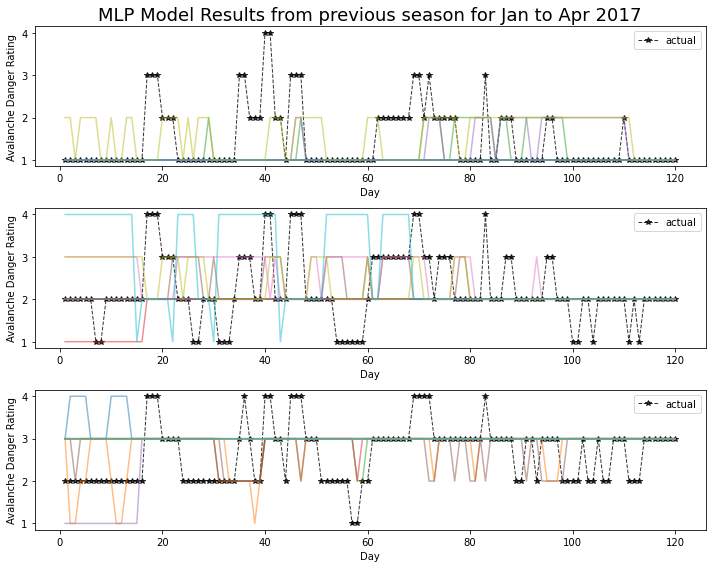

In [152]:
plt.figure(figsize=(10,8))

plt.subplot(311)
plt.plot(days_2017,below_tree_2017,color='k',label='actual',alpha=0.8,marker='*',linewidth=1,linestyle='dashed')
for i in range(10):
    plt.plot(days_2017,bt_class[i],alpha=0.5)
plt.xlabel('Day')
plt.ylabel('Avalanche Danger Rating')
plt.legend(loc = 'best')
plt.xticks([0, 31, 59, 90, 120],['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1', 'Apr 30'])
plt.title('MLP Model Results from previous season for Jan to Apr 2017', fontsize = 18)

plt.subplot(312)
plt.plot(days_2017,tree_2017,color='k',label='actual',alpha=0.8,marker='*',linewidth=1,linestyle='dashed')
for i in range(10):
    plt.plot(days_2017,t_class[i],alpha=0.5)
plt.xlabel('Day')
plt.ylabel('Avalanche Danger Rating')
plt.xticks([0, 31, 59, 90, 120],['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1', 'Apr 30'])
plt.legend(loc = 'best')

plt.subplot(313)
plt.plot(days_2017,above_tree_2017,color='k',label='actual',alpha=0.8,marker='*',linewidth=1,linestyle='dashed')
for i in range(10):
    plt.plot(days_2017,at_class[i],alpha=0.5)
plt.xlabel('Day')
plt.ylabel('Avalanche Danger Rating')
plt.xticks([0, 31, 59, 90, 120],['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1', 'Apr 30'])
plt.legend(loc = 'best')

plt.tight_layout()
if saveIt:
    plt.savefig(f'fig_JanApr2017_model_results.png')
